# Use the D.C. Residential Properties dataset (Links to an external site.) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

## Same csv file used in week 1 boot camp

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "datasets/DC_Properties.csv"

props_df = pd.read_csv(filepath)
props_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
# we need to work with PRICE column so determine rows with NaN values
props_df['PRICE'].isna().sum()

60741

In [4]:
# Also check for null values
props_df['PRICE'].isnull().sum()

60741

In [5]:
# Can't just drop the rows with no PRICE data since there are so many
# Use the word location to determine mean price of house there and use it
#rows where the age is missing
missing_price = props_df.loc[props_df['PRICE'].isnull()]
missing_price.head()


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
10,10,3,0,Forced Air,N,3.0,12,5,1890.0,1950.0,...,-77.040760,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [6]:
# get index numbers of missing rows - we'll use this later
missingIndexes = list(missing_price.index)
#len(missingIndexes)
#str = props_df.iat[missingIndexes]
#str

In [7]:
# table of avg price per ward
#out = props_df.groupby(['WARD', 'CNDTN', 'STORIES'])['PRICE'].mean()
#out

#fill missing values for age based on survival status, sex, and passenger class
#df['age'].fillna(df.groupby(['survived', 'sex', 'pclass'])['age'].transform('mean'), inplace=True)
props_df['PRICE'].fillna(props_df.groupby(['WARD'])['PRICE'].transform('mean'), inplace=True)

#modeldf['TravelAlone']=np.where((modeldf['family_num'] > 0), 0, 1)


#avgWardPrice = props_df.groupby(['WARD'])['PRICE'].mean()
#print(avgWardPrice['Ward 1'])
#print(avgWardPrice['Ward 2'])

In [8]:
# Check for missing price values again
print(props_df['PRICE'].isnull().sum())
print(props_df['PRICE'].isna().sum())
print(props_df['PRICE'].notna().sum())
test = props_df['PRICE'].isna()
#type(test)
#len(test)

1
1
158956


In [9]:
#Method 1: manual calculation of z-scores for 'PRICE' column

#mean for the column
mean = props_df['PRICE'].mean()

#standard deviation of the column
std = props_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (props_df['PRICE'] - mean)/std

In [10]:
#values for mean and standard deviation of 'Glucose column'
mean, std

(919809.386210441, 5582017.813931229)

In [11]:
price_z_manual.head()

0    0.031385
1    0.032024
2    0.211427
3    0.122212
4    0.032024
Name: PRICE, dtype: float64

In [12]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'PRICE' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(props_df[['PRICE']])

In [13]:
#mean and standard deviation of z-score standardized 'PRICE' column
price_zscore.mean(), price_zscore.std()

(nan, nan)

In [14]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
p_z_col = pd.Series(price_zscore.reshape(-1))

In [15]:
p_z_col.head()

0    0.031385
1    0.032025
2    0.211428
3    0.122213
4    0.032025
dtype: float64

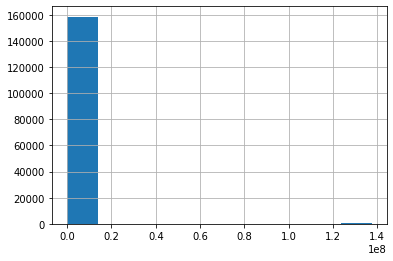

In [16]:
#BEFORE: frequency count plot of 'PRICE' column
props_df['PRICE'].hist()